<a href="https://colab.research.google.com/github/choderalab/pinot/blob/noise-model/scripts/infrastructure_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! rm -rf pinot
! git clone https://github.com/choderalab/pinot.git -b noise-model
! pip install dgl
! wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
! chmod +x Miniconda3-latest-Linux-x86_64.sh
! time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
! time conda install -q -y -c conda-forge rdkit
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
sys.path.append('/content/pinot/')
import pinot
import dgl
import torch
import numpy
import matplotlib

Cloning into 'pinot'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (314/314), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 1173 (delta 169), reused 166 (delta 66), pack-reused 859
Receiving objects: 100% (1173/1173), 154.95 MiB | 13.48 MiB/s, done.
Resolving deltas: 100% (470/470), done.
     |████████████████████████████████| 3.0MB 2.8MB/s 
--2020-05-08 20:23:07--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-05-08 20:23:08--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 1

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [0]:
import pinot

In [20]:
net = pinot.Net(
    representation=pinot.representation.Sequential(
        pinot.representation.dgl_legacy.GN,
        [32, 'tanh', 32, 'tanh', 32, 'tanh']),
    parameterization=pinot.regression.Linear(32, 2),
    param_transform=(lambda mu, sigma: (mu, 1.0)))

ds = pinot.data.utils.batch(
    pinot.data.esol()[:50],
    10)

ds_tr, ds_te = pinot.data.utils.split(
    ds,
    [4, 1])

train = pinot.Train(
    net=net,
    data=ds_tr,
    optimizer=torch.optim.Adam(net.parameters(), 1e-3),
    n_epochs=300)

train.train()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [21]:
test_tr = pinot.Test(
    net=net,
    data=ds_tr,
    states=train.states).test()

test_te = pinot.Test(
    net=net,
    data=ds_te,
    states=train.states).test()



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


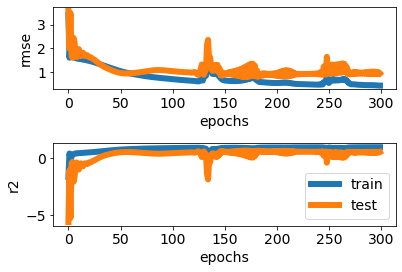

In [22]:
plt = pinot.app.report.visual(
    {'train': test_tr, 'test': test_te}
)

In [0]:
md = pinot.app.report.markdown(
    {'train': test_tr, 'test': test_te}
)

In [24]:
print(md)

|              |rmse          |r2            |
|------------- |------------- |------------- |
|train         |0.4414        |0.9553        |
|test          |0.9526        |0.5328        |

